## 6.4 Homework

### 6.4.1 Try to find a way to deal with the noisy data and give your reasoning.


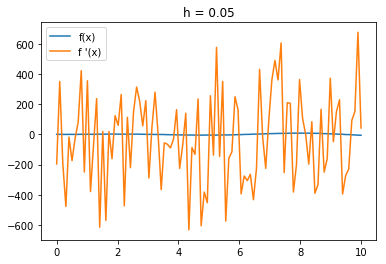

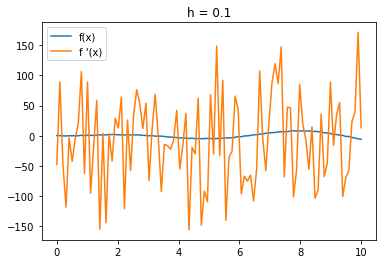

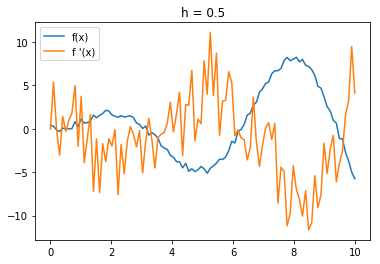

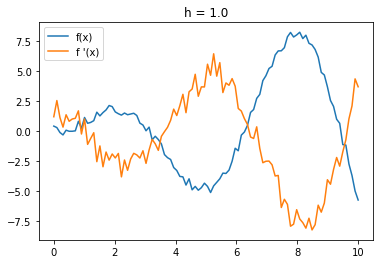

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

#function to calculate and plot the derivitive of the specified function
def deriv(a,b,npoints,h):
    np.random.seed(0)
    #function of some noisy data
    f = lambda x: x * np.sin(x) + np.random.rand(npoints) - 0.5 
    x = np.linspace(a,b,npoints)
    #derivative calculation
    central_derivative = (f(x+h)-2*f(x)+f(x-h))/h**2
    #plot of function and it's derivative
    ax = plt.subplot(111)
    plt.plot(x,f(x), label = 'f(x)')
    plt.plot(x,central_derivative,label = "f '(x)")
    plt.title('h = ' + str(h))
    ax.legend()
    plt.show()

#varying heights 
h = [0.05,0.1,0.5,1.]
a,b = 0,3
npoints = 100

#function call over varying heights
for i in h:
    deriv(0,10,100,i)

#### To calculate the derivative for the function f(x) I chose to increase the value of h included in the derivative calculation. I did this since the task was to find the derivative of the whole range of the function, and not in one particular point in the domain. 



### 6.4.2 Heat capacity of a solid
Debye's thory of solids gives the heat capacity of a solid at temperature $T$ to be

$$C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$$

where $V$ is the volume of the solid, $\rho$ is the density of atoms, $k_B$ is Boltzmann constant, and $\theta$ is the Debye temperature.

- Write a program to calculate $C_V$ for a given value of $T$ for a sample of 1000 $cm^3$ of aluminum, in which the density $\rho$ is 6.022 $\times 10^{28} m^3$ and $\theta_D$ = 428 K. 

- Choose at least one wa to do the integral from the followings
     - Simpson or trapezoid rule by yourself
     - one built-function from scipy

- Plot $C_V$ as a function of temperature from $T$ = 5 K to $T$ = 500 K.

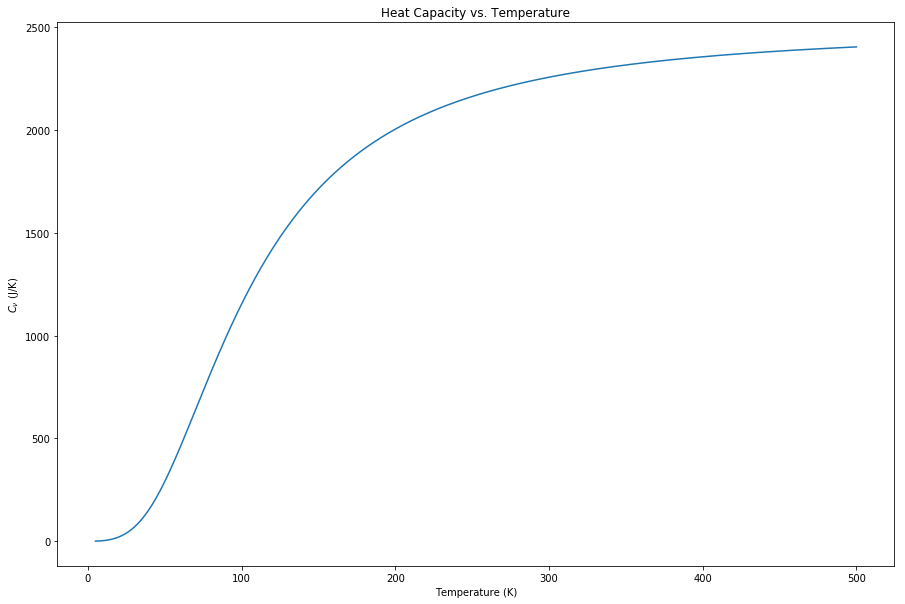

In [9]:
from scipy import integrate
from numpy import exp

#constants
V = 0.001 #m**3
p = 6.022e28 #m**3
ThetaD = 428 #K
k = 1.38e-23 #J/K

#temperatures
T = np.linspace(5,500,1000)

#function
f = lambda x:((x**4)*exp(x))/(exp(x)-1)**2

#integration
integrals = []
for temp in range(len(T)):
    integrals.append((((T[temp]/ThetaD)**3)*9*V*p*k)*(integrate.quad(f,0,ThetaD/T[temp]))[0])

#plot
plt.figure(figsize=(15,10))
plt.title('Heat Capacity vs. Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$C_\nu$ (J/K)')
plt.plot(T,integrals)
plt.show()